# U.S. Medical Insurance Costs

Let's first import useful libraries for this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, we'll import our insurance data and save it as a Pandas dataframe.

In [2]:
df = pd.read_csv('insurance.csv')
df['sex_num'] = df['sex'].apply(lambda x: 1 if x == 'female' else 0)
df['smoker_num'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


Let's break down our data by column.

In [3]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [4]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [5]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [6]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Now, let's take a look at the centers and spreads of our numerical data.

In [7]:
def center_spread(column):
    average = df[column].mean()
    stdev = df[column].std()
    min_ = df[column].min()
    q1 = df[column].quantile(0.25)
    median = df[column].median()
    q3 = df[column].quantile(0.75)
    max_ = df[column].max()
    
    print("Average " + column.title() + ": " + str(average) + "; St. Dev.: " + str(stdev))
    print("Min " + column.title() + ": " + str(min_) + "; Q1: " + str(q1) + "; Median: " + str(median) + "; Q3: " + str(q3) + "; Max: " + str(max_))
    print('')
    
    #return average, stdev, min_, q1, median, q3, max_

In [8]:
center_spread('age')
center_spread('bmi')
center_spread('children')
center_spread('charges')

Average Age: 39.20702541106129; St. Dev.: 14.049960379216172
Min Age: 18; Q1: 27.0; Median: 39.0; Q3: 51.0; Max: 64

Average Bmi: 30.663396860986538; St. Dev.: 6.098186911679017
Min Bmi: 15.96; Q1: 26.29625; Median: 30.4; Q3: 34.69375; Max: 53.13

Average Children: 1.0949177877429; St. Dev.: 1.2054927397819095
Min Children: 0; Q1: 0.0; Median: 1.0; Q3: 2.0; Max: 5

Average Charges: 13270.422265141257; St. Dev.: 12110.011236693994
Min Charges: 1121.8739; Q1: 4740.28715; Median: 9382.033; Q3: 16639.912515; Max: 63770.42801



Next, we'll look at average aggregate data for each column.

In [9]:
def averages_by_column(column):
    averages_by_column = df.groupby(column).mean().reset_index()
    return averages_by_column

In [10]:
age_averages = averages_by_column('age')
age_averages.head()

,age,bmi,children,charges,sex_num,smoker_num
0,18,31.326159,0.449275,7086.217556,0.478261,0.173913
1,19,28.596912,0.426471,9747.909335,0.485294,0.264706
2,20,30.632759,0.862069,10159.697736,0.482759,0.310345
3,21,28.185714,0.785714,4730.464330,0.464286,0.071429
4,22,31.087679,0.714286,10012.932802,0.464286,0.214286


In [11]:
children_averages = averages_by_column('children')
children_averages

,children,age,bmi,charges,sex_num,smoker_num
0,0,38.444251,30.550296,12365.975602,0.503484,0.200348
1,1,39.453704,30.623148,12731.171832,0.487654,0.188272
2,2,39.445833,30.978104,15073.563734,0.495833,0.229167
3,3,41.566879,30.684331,15355.318367,0.490446,0.248408
4,4,39.000000,31.391200,13850.656311,0.440000,0.120000
5,5,35.611111,29.605000,8786.035247,0.444444,0.055556


In [12]:
sex_averages = averages_by_column('sex')
sex_averages

,sex,age,bmi,children,charges,sex_num,smoker_num
0,female,39.503021,30.377749,1.074018,12569.578844,1.0,0.173716
1,male,38.917160,30.943129,1.115385,13956.751178,0.0,0.235207


In [13]:
smoker_averages = averages_by_column('smoker')
smoker_averages

,smoker,age,bmi,children,charges,sex_num,smoker_num
0,no,39.385338,30.651795,1.090226,8434.268298,0.514098,0.0
1,yes,38.514599,30.708449,1.113139,32050.231832,0.419708,1.0


In [14]:
region_averages = averages_by_column('region')
region_averages

,region,age,bmi,children,charges,sex_num,smoker_num
0,northeast,39.268519,29.173503,1.046296,13406.384516,0.496914,0.206790
1,northwest,39.196923,29.199785,1.147692,12417.575374,0.504615,0.178462
2,southeast,38.939560,33.355989,1.049451,14735.411438,0.480769,0.250000
3,southwest,39.455385,30.596615,1.141538,12346.937377,0.498462,0.178462


In [15]:
def plot_bar(df, x_, y_):
    sns.set_style('whitegrid')
    sns.barplot(x=x_, y=y_, data=df)

In [16]:
def plot_scatter(df, x, y, reg='linear'):
    plt.scatter(df[x], df[y], alpha=0.6)
    
    plt.title(y.title() + ' vs. ' + x.title())
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    
    x_ = np.array(df[x])
    y_ = np.array(df[y])
    
    m, b = np.polyfit(x_, y_, 1)
    if reg == 'linear':
        plt.plot(x_, m*x_ + b, color='r')
    a, b, c = np.polyfit(x_, y_, 2)
    if reg == 'quadratic':
        plt.plot(x_, a*x_**2 + b*x_ + c, color='r')
    
    plt.show()

### Average Charges by Number of Children

One would expect average charges to increase with number of children.

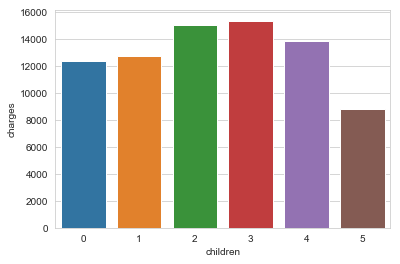

In [17]:
plot_bar(children_averages, 'children', 'charges')

The data shows this trend to be true for individuals with three or fewer children.  However, average charges drop significantly for folks with four or more children.  Why could that be?

We know that being a smoker significantly increases medical insurance costs, so let's check that first.

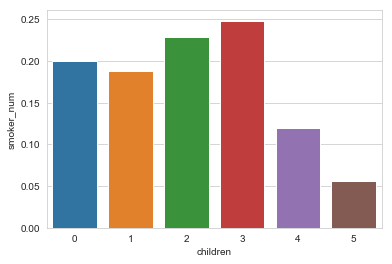

In [18]:
plot_bar(children_averages, 'children', 'smoker_num')

The above bar plot shows the percentage of smokers by the number of children.  We can see that this looks quite similar to our plot of charges.  Thus, it would be reasonable to say that insurance costs are highly dependent on whether an individual is a smoker.  Also, we can say that lower average costs among individuals with four or more children is largely because they are less likely to be smokers than those with fewer children.

### Average Charges by Sex

Unfortunately, this dataset doesn't represent non-binary individuals.  Nonetheless, let's see if there is any bias with respect to sex.

We expect males to have greater insurance costs due to an increased risk of serious injury (also leading to lower life expectancy).

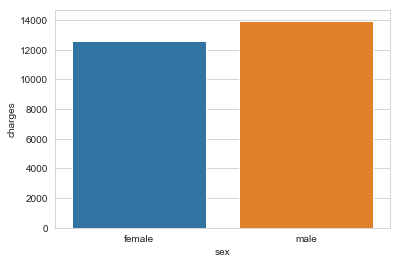

In [19]:
plot_bar(sex_averages, 'sex', 'charges')

The above plot confirms our suspicion, but let's break down what actually causes men to have higher insurance costs.

Again, with our knowledge of the effect of smoking on insurance costs, we'll check that first.

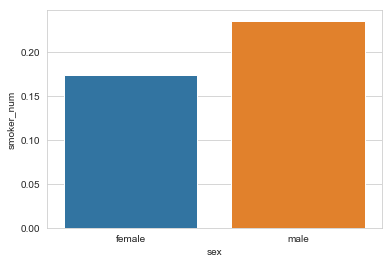

In [20]:
plot_bar(sex_averages, 'sex', 'smoker_num')

The above plot shows that men are much more likely to be smokers than women.  This could be a significant contributor to men's insurance costs being higher than women. <br><br> The dataset didn't include any data on serious injury, but we believe men being smokers probably has greater effect on insurance cost than risk of serious injury.

Next, let's take a look at sex and BMI, since high BMI is detrimental to health and, thus, increases insurance costs.  If there is a large difference here, as in our smoker plot, we would say that BMI is another primary factor for higher insurance costs among men.

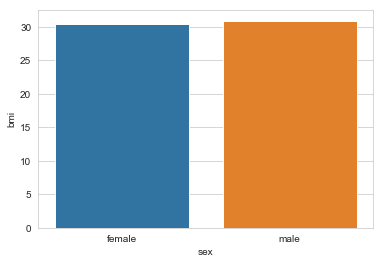

In [21]:
plot_bar(sex_averages, 'sex', 'bmi')

BMI seems fairly similar among women and men, so that's not really a factor in the insurance difference.

Before, we couldn't conclude that having more children increases insurance costs due to the impact of smoking on that data.  However, we'll see if there's any difference in number of children between men and women.

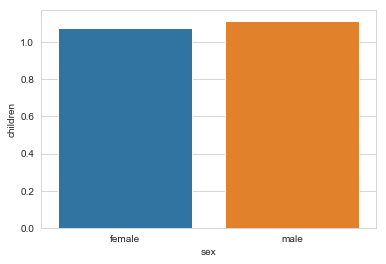

In [22]:
plot_bar(sex_averages, 'sex', 'children')

The average number of children is roughly the same among men and women, so we can conclude that the prevalence of smoking among men is almost exclusively the reason for higher medical insurance costs than women.

### Average Charges by Smoker Status

We've seen in previous sections the effect of smoking on insurance costs, but now let's look at the actual difference in costs between smokers and non-smokers.  Based on previous analyses, we should expect smokers to have insurance costs about twice as high as non-smokers.

3.8000014582889188


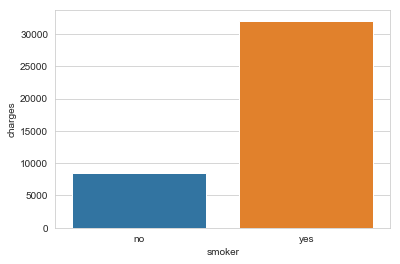

In [23]:
print(32050.231832 / 8434.268298)
plot_bar(smoker_averages, 'smoker', 'charges')

Wow!  That is a huge difference!  Using the average charges for each group, smokers' medical insurance costs are 3.8 times higher than non-smokers.  Obviously, smoking has a huge impact on an individual's health, and this is clearly shown in the cost of health insurance.

### Average Charges by Region

Now, we'll analyze any role region plays in determining medical insurance costs.

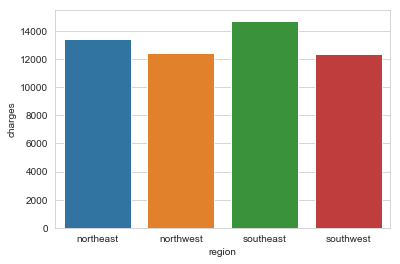

In [24]:
plot_bar(region_averages, 'region', 'charges')

At first it doesn't seem like there's any significant difference between the regions.  However, the absolute difference in average cost for the "southeast" region is at least $1,000 greater than any other region.  What could potentially explain that difference?

Let's first check how smoking affects insurance costs by region.

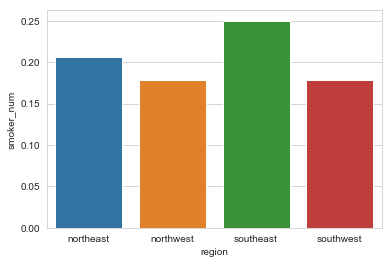

In [25]:
plot_bar(region_averages, 'region', 'smoker_num')

We can see from the above plot that smoking rate is higher in the southeast region than in other regions.  This is probably the biggest factor in the cost difference.

We'll also take a look at average BMI in each region.

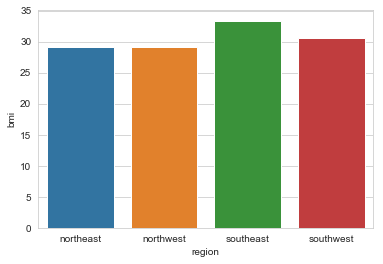

In [26]:
plot_bar(region_averages, 'region', 'bmi')

The average BMI in the southeast region is about 3 kg/m<sup>2</sup> higher than any other region.  This is another major factor as to why the region has the highest average insurance cost.

### Average Charges by Age

Now, let's take a look at how age affects average medical insurance cost.

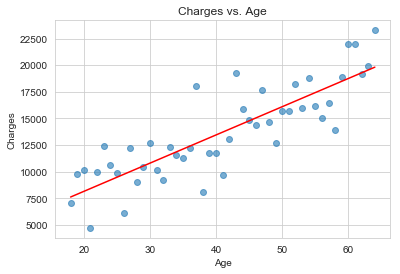

In [27]:
plot_scatter(age_averages, 'age', 'charges', 'linear')

Using a bar plot as with the previous data wasn't reasonable for the age data, since there are many more data points to plot.  For that reason, we've used a scatter plot with linear regression. <br><br> We can see clearly see that insurance cost increases with age, but what factors contribute to this trend?

Let's investigate how BMI changes with age.

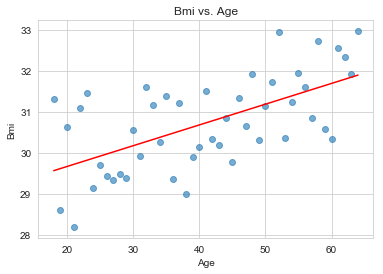

In [28]:
plot_scatter(age_averages, 'age', 'bmi', 'linear')

We can see that BMI also increases with age, so that is probably a contributor to increasing medical costs.

Now, let's see if the number of children a person has affects the insurance cost with age.

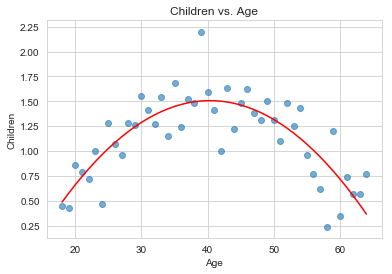

In [29]:
plot_scatter(age_averages, 'age', 'children', 'quadratic')

We can see that the average number of children has a concave quadratic shape.  This makes sense because people tend to have their first child sometime in their twenties, then have more shortly thereafter.  Having the most children under one's care usually occurs around age 40, then that number begins to decrease as children leave the house. <br><br> Since this data is quadratic and not positive linear, it isn't likely that number of children contributes to the increase in insurance costs with age.

Next, we'll take a look at how the ratio of females to males could affect the increase in cost with age.

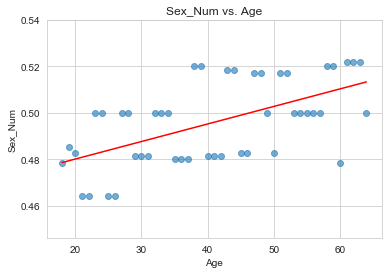

In [30]:
plot_scatter(age_averages, 'age', 'sex_num', 'linear')

We can see that the ratio of females to males increases with age.  This makes sense because females usually live longer than men.  However, we know that men typically have higher medical insurance costs, so we can disregard this data as having an effect on increasing costs with age.

Finally, we'll investigate the effect of smoking status has on the insurance cost with age.

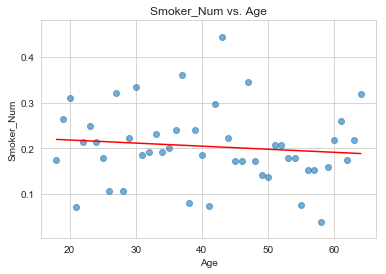

In [31]:
plot_scatter(age_averages, 'age', 'smoker_num', 'linear')

This smoker data doesn't have a very strong correlation, but the regression is slightly negative.  Since the correlation is fairly weak, smoking status probably doesn't have much effect on increasing medical insurance costs with age.